<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="cognitiveclass.ai logo">
</center>


# Machine Learning Foundation

## Course 4, Part d: Dimensionality Reduction DEMO


## Introduction

We will be using customer data from a [Portuguese wholesale distributor](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers) for clustering. This data file is called `Wholesale_Customers_Data`.

It contains the following features:

* Fresh: annual spending (m.u.) on fresh products
* Milk: annual spending (m.u.) on milk products
* Grocery: annual spending (m.u.) on grocery products
* Frozen: annual spending (m.u.) on frozen products
* Detergents_Paper: annual spending (m.u.) on detergents and paper products
* Delicatessen: annual spending (m.u.) on delicatessen products
* Channel: customer channel (1: hotel/restaurant/cafe or 2: retail)
* Region: customer region (1: Lisbon, 2: Porto, 3: Other)

In this data, the values for all spending are given in an arbitrary unit (m.u. = monetary unit).


In [62]:
# Bỏ qua cảnh báo
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Nhập các thư viện cần thiết
import seaborn as sns, pandas as pd, numpy as np

In [63]:
# Nhập các thư viện cần thiết
import os, pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

## TASK 1



__Task 1 includes Part 1 to Part 4 which covers data acquistion, preprocessing and PCA__


## Part 1

In this section, we will:

* Import the data and check the data types.
* Drop the channel and region columns as they won't be used since we focus on numeric columns for this example.
* Convert the remaining columns to floats if necessary.
* Copy this version of the data (using the `copy` method) to a variable to preserve it. We will be using it later.


In [64]:
# Đọc dữ liệu từ URL được chỉ định vào DataFrame của pandas
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/Wholesale_Customers_Data.csv', sep=',')

In [65]:
# Hiển thị hình dạng của DataFrame (số hàng, số cột)
data.shape

(440, 8)

In [66]:
# Hiển thị 5 hàng đầu tiên của DataFrame
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [67]:
# Xóa các cột 'Channel' và 'Region' khỏi DataFrame
data = data.drop(['Channel', 'Region'], axis=1)

In [68]:
# Hiển thị các kiểu dữ liệu của từng cột trong DataFrame
data.dtypes

,0
Fresh,int64
Milk,int64
Grocery,int64
Frozen,int64
Detergents_Paper,int64
Delicassen,int64


In [69]:
# Chuyển đổi tất cả các cột trong DataFrame sang kiểu float
for col in data.columns:
    data[col] = data[col].astype(float)

Preserve the original data.


In [70]:
# Tạo một bản sao của DataFrame và lưu trữ trong data_orig
data_orig = data.copy()

## Part 2

As with the previous lesson, we need to ensure the data is scaled and (relatively) normally distributed.

* Examine the correlation and skew.
* Perform any transformations and scale data using your favorite scaling method.
* View the pairwise correlation plots of the new data.


In [71]:
# Tính ma trận tương quan của DataFrame
corr_mat = data.corr()

# Đặt các giá trị đường chéo của ma trận tương quan thành 0.0
for x in range(corr_mat.shape[0]):
    corr_mat.iloc[x,x] = 0.0

# Hiển thị ma trận tương quan
corr_mat

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,0.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,0.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,0.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,0.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,0.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,0.000000


As before, the two categories with their respective most strongly correlated variable.


In [72]:
# Tìm cột có tương quan tuyệt đối cao nhất cho mỗi cột
corr_mat.abs().idxmax()

,0
Fresh,Frozen
Milk,Grocery
Grocery,Detergents_Paper
Frozen,Delicassen
Detergents_Paper,Grocery
Delicassen,Milk


Examine the skew values and log transform. Looks like all of them need it.


In [73]:
# Tính độ xiên của từng cột, sắp xếp theo thứ tự giảm dần và lọc cho độ xiên > 0.75
log_columns = data.skew().sort_values(ascending=False)
log_columns = log_columns.loc[log_columns > 0.75]

# Hiển thị các cột đã chọn và độ xiên của chúng
log_columns

,0
Delicassen,11.151586
Frozen,5.907986
Milk,4.053755
Detergents_Paper,3.631851
Grocery,3.587429
Fresh,2.561323


In [74]:
# Áp dụng biến đổi log1p cho các cột đã chọn
for col in log_columns.index:
    data[col] = np.log1p(data[col])

Scale the data again. Let's use `MinMaxScaler` this time just to mix things up.


In [75]:
# Nhập MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Khởi tạo MinMaxScaler
mms = MinMaxScaler()

# Áp dụng Min-Max scaling cho từng cột trong DataFrame
for col in data.columns:
    data[col] = mms.fit_transform(data[[col]]).squeeze()

Visualize the relationship between the variables.


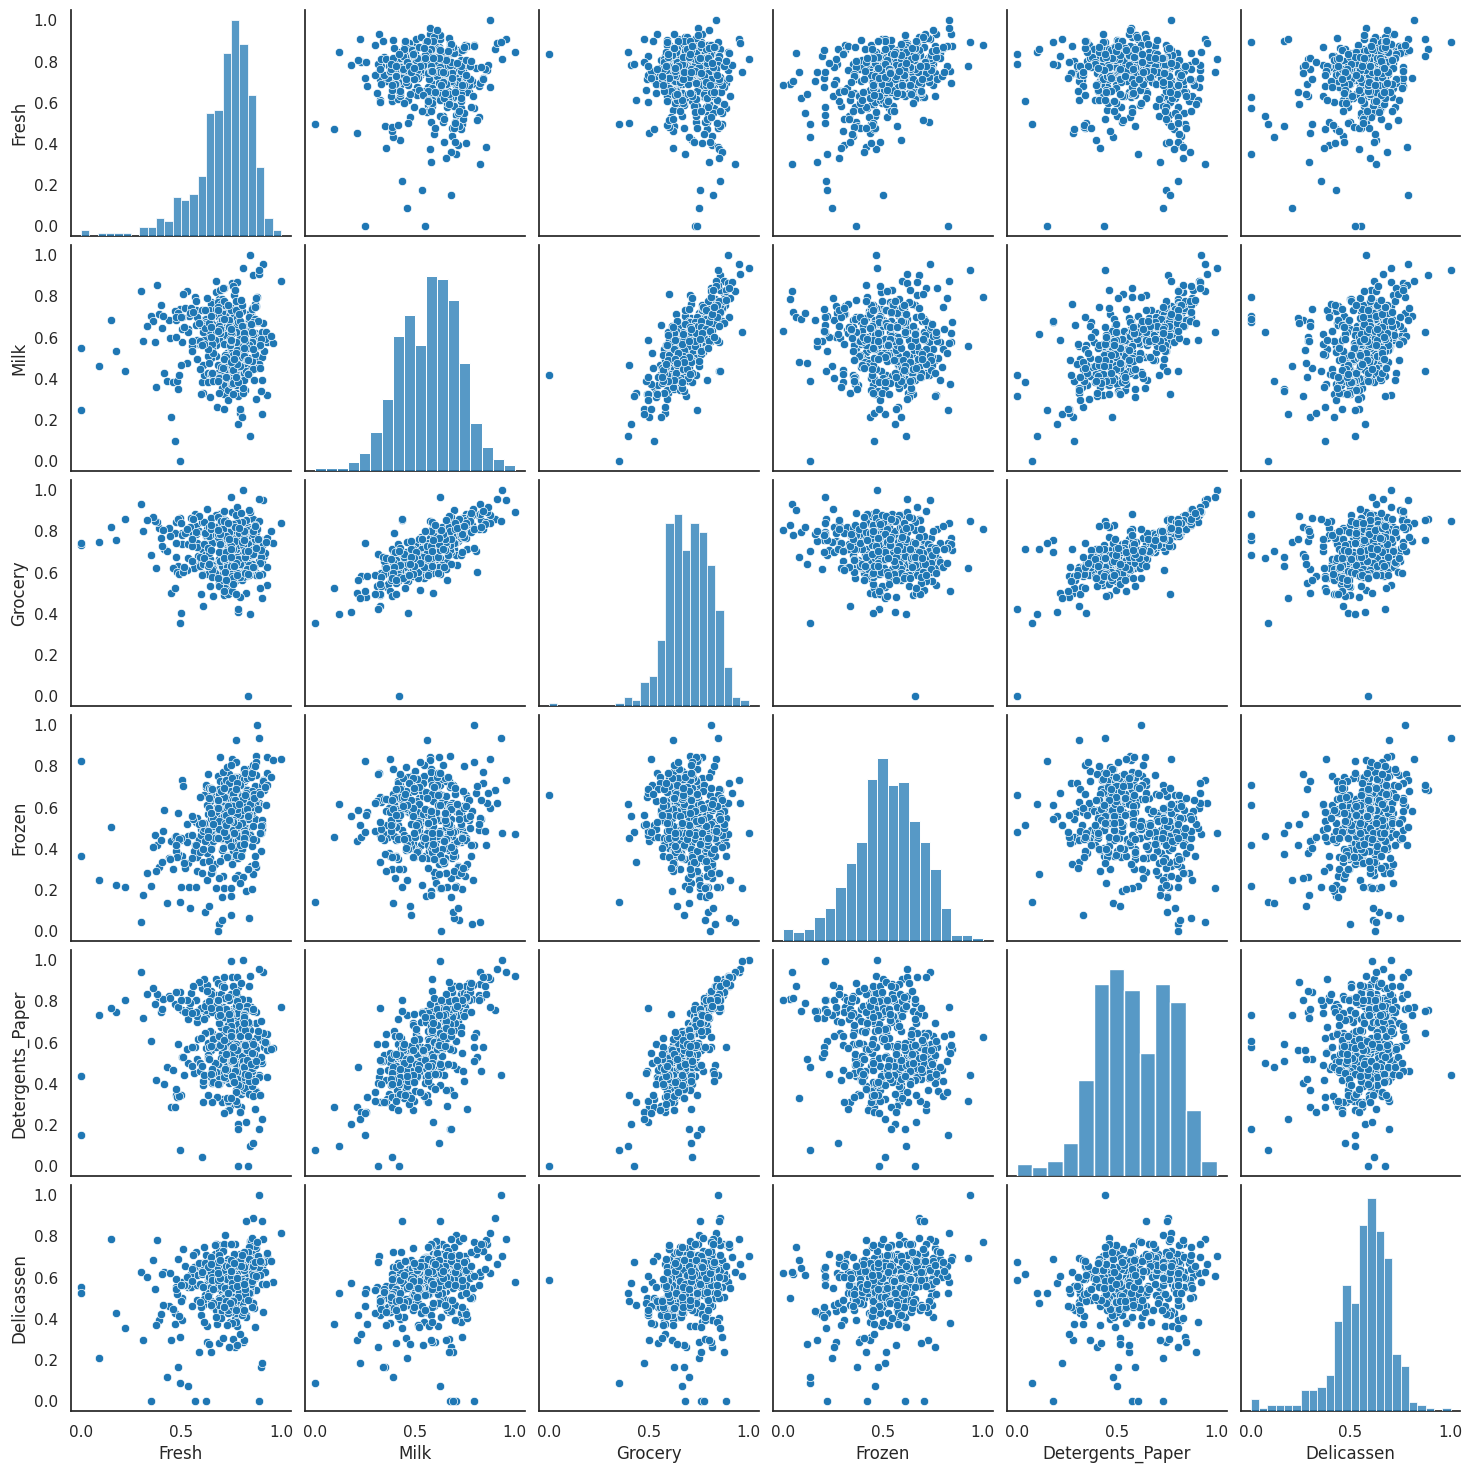

In [76]:
# Đặt ngữ cảnh và kiểu seaborn cho việc vẽ biểu đồ
sns.set_context('notebook')
sns.set_style('white')
# Tạo biểu đồ phân tán cặp của DataFrame
sns.pairplot(data);

## Part 3

In this section, we will:
* Using Scikit-learn's [pipeline function](http://scikit-learn.org/stable/modules/pipeline.html), recreate the data pre-processing scheme above (transformation and scaling) using a pipeline. If you used a non-Scikit learn function to transform the data (e.g. NumPy's log function), checkout  the custom transformer class called [`FunctionTransformer`](http://scikit-learn.org/stable/modules/preprocessing.html#custom-transformers).
* Use the pipeline to transform the original data that was stored at the end of question 1.
* Compare the results to the original data to verify that everything worked.

*Note:* Scikit-learn has a more flexible `Pipeline` function and a shortcut version called `make_pipeline`. Either can be used. Also, if different transformations need to be performed on the data, a [`FeatureUnion`](http://scikit-learn.org/stable/modules/pipeline.html#featureunion-composite-feature-spaces) can be used.


In [77]:
# Nhập các module cần thiết cho pipeline và transformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

# Tạo một transformer tùy chỉnh cho biến đổi log1p bằng FunctionTransformer
log_transformer = FunctionTransformer(np.log1p)

# Định nghĩa các bước cho pipeline: biến đổi log1p và MinMaxScaler
estimators = [('log1p', log_transformer), ('minmaxscale', MinMaxScaler())]
# Tạo pipeline
pipeline = Pipeline(estimators)

# Áp dụng pipeline cho dữ liệu gốc (data_orig)
data_pipe = pipeline.fit_transform(data_orig)

The results are identical. Note that machine learning models and grid searches can also be added to the pipeline (and in fact, usually are.)


In [78]:
# So sánh kết quả của biến đổi pipeline với dữ liệu được biến đổi thủ công
np.allclose(data_pipe, data)

True

## Part 4

In this section, we will:
* Perform PCA with `n_components` ranging from 1 to 5.
* Store the amount of explained variance for each number of dimensions.
* Also store the feature importance for each number of dimensions. *Hint:* PCA doesn't explicitly provide this after a model is fit, but the `components_` properties can be used to determine something that approximates importance. How you decided to do so is entirely up to you.
* Plot the explained variance and feature importances.


In [79]:
# Nhập PCA
from sklearn.decomposition import PCA

# Khởi tạo danh sách để lưu trữ các mô hình PCA và trọng số đặc trưng
pca_list = list()
feature_weight_list = list()

# Huấn luyện các mô hình PCA với số lượng thành phần khác nhau (từ 1 đến 5)
for n in range(1, 6):

    # Tạo và huấn luyện mô hình PCA
    PCAmod = PCA(n_components=n)
    PCAmod.fit(data)

    # Lưu trữ số lượng thành phần, mô hình đã huấn luyện và tỷ lệ phương sai được giải thích
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))

    # Tính toán và lưu trữ tầm quan trọng của đặc trưng dựa trên giá trị tuyệt đối của các thành phần
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n,
                                             'features': data.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))

# Nối các kết quả PCA và đặt chỉ mục thành 'n'
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
# Hiển thị DataFrame kết quả PCA
pca_df

,model,var
n,,
1,PCA(n_components=1),0.448011
2,PCA(n_components=2),0.72099
3,PCA(n_components=3),0.827534
4,PCA(n_components=4),0.923045
5,PCA(n_components=5),0.979574


Create a table of feature importances for each data column.


In [80]:
# Nối các dataframe trọng số đặc trưng và xoay để tạo bảng tầm quan trọng của đặc trưng
features_df = (pd.concat(feature_weight_list)
               .pivot(index='n', columns='features', values='values'))

# Hiển thị dataframe tầm quan trọng của đặc trưng
features_df

features,Delicassen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
n,,,,,,
1,0.071668,0.335487,0.060620,0.095979,0.190236,0.246010
2,0.151237,0.177519,0.158168,0.222172,0.112032,0.178872
3,0.165518,0.145815,0.211434,0.268363,0.084903,0.123967
4,0.224259,0.149981,0.239527,0.214275,0.070971,0.100987
5,0.211840,0.182447,0.196382,0.178104,0.067338,0.163888


Create a plot of explained variances.


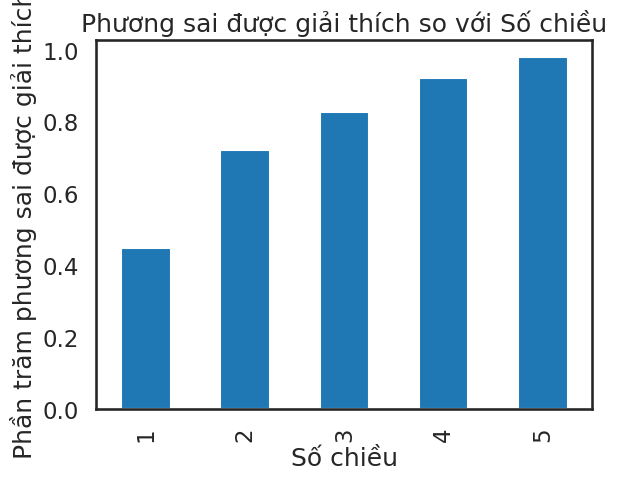

In [81]:
# Đặt ngữ cảnh seaborn cho việc vẽ biểu đồ
sns.set_context('talk')
# Tạo biểu đồ thanh của tỷ lệ phương sai được giải thích so với số chiều
ax = pca_df['var'].plot(kind='bar')

# Đặt nhãn và tiêu đề của biểu đồ
ax.set(xlabel='Số chiều',
       ylabel='Phần trăm phương sai được giải thích',
       title='Phương sai được giải thích so với Số chiều');

And here's a plot of feature importances.


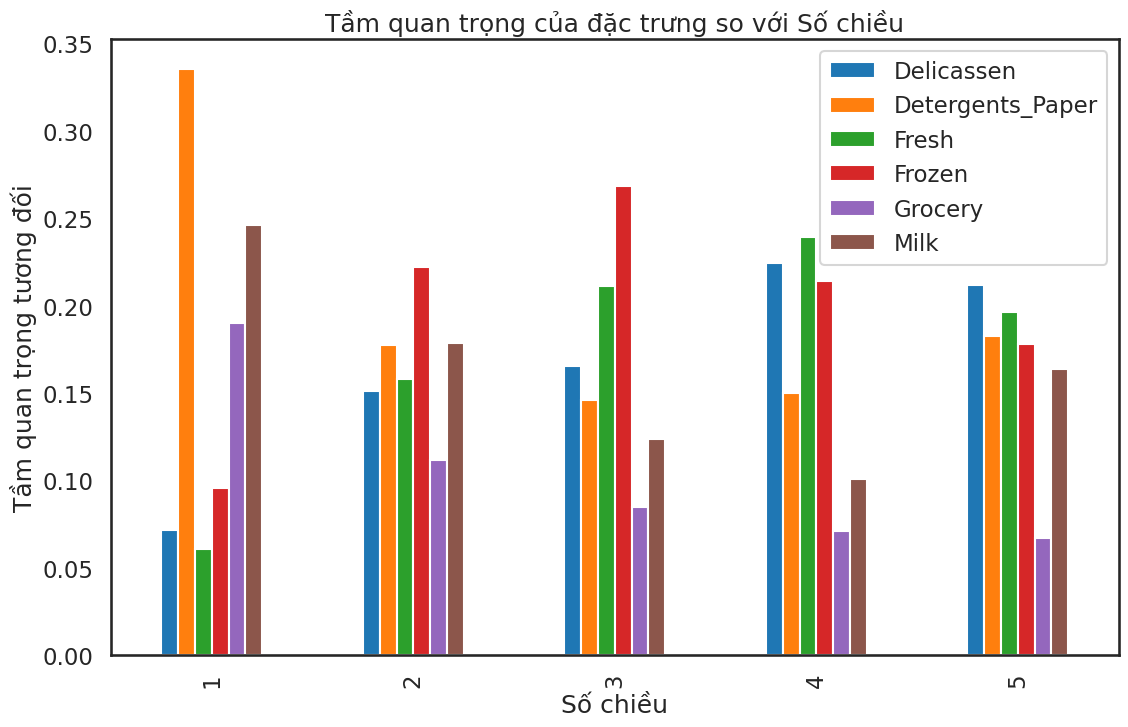

In [82]:
# Tạo biểu đồ thanh của tầm quan trọng của đặc trưng so với số chiều
ax = features_df.plot(kind='bar', figsize=(13,8))
# Đặt vị trí chú giải
ax.legend(loc='upper right')
# Đặt nhãn và tiêu đề của biểu đồ
ax.set(xlabel='Số chiều',
       ylabel='Tầm quan trọng tương đối',
       title='Tầm quan trọng của đặc trưng so với Số chiều');

This concludes "Demo lab: Dimensionality Reduction (Part 1)". We will be going over the remaining parts in the next module.


## TASK 2



__Task 2 covers part 5 and 6. It includes KernelPCA and Model accuracy.__



>Note: Task 1 is a pre-requisite for this task. Please make sure you complete Task 1 before proceeding to Task 2.


## Part 5

In this section, we will:
* Fit a `KernelPCA` model with `kernel='rbf'`. You can choose how many components and what values to use for the other parameters (`rbf` refers to a Radial Basis Function kernel, and the `gamma` parameter governs scaling of this kernel and typically ranges between 0 and 1). Several other [kernels](https://scikit-learn.org/stable/modules/metrics.html) can be tried, and even passed ss cross validation parameters (see this [example](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html)).
* If you want to tinker some more, use `GridSearchCV` to tune the parameters of the `KernelPCA` model.

The second step is tricky since grid searches are generally used for supervised machine learning methods and rely on scoring metrics, such as accuracy, to determine the best model. However, a custom scoring function can be written for `GridSearchCV`, where larger is better for the outcome of the scoring function.

What would such a metric involve for PCA? What about percent of explained variance? Or perhaps the negative mean squared error on the data once it has been transformed and then inversely transformed?


In [83]:
# Nhập các module cần thiết cho KernelPCA, GridSearchCV và mean_squared_error
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Hàm chấm điểm tùy chỉnh sử dụng âm căn bậc hai sai số trung bình của biến đổi ngược
def scorer(pcamodel, X, y=None):

    # Chuyển đổi X thành mảng numpy nếu nó là DataFrame của pandas
    try:
        X_val = X.values
    except:
        X_val = X

    # Tính toán và biến đổi ngược dữ liệu bằng mô hình KernelPCA
    data_inv = pcamodel.fit(X_val).transform(X_val)
    data_inv = pcamodel.inverse_transform(data_inv)

    # Tính toán sai số trung bình bình phương giữa dữ liệu gốc và dữ liệu được biến đổi ngược
    mse = mean_squared_error(data_inv.ravel(), X_val.ravel())

    # Trả về âm MSE làm điểm (giá trị lớn hơn là tốt hơn cho GridSearchCV)
    return -1.0 * mse

# Định nghĩa lưới tham số cho GridSearchCV
param_grid = {'gamma':[0.001, 0.01, 0.05, 0.1, 0.5, 1.0],
              'n_components': [2, 3, 4]}

# Khởi tạo GridSearchCV với KernelPCA, lưới tham số và hàm chấm điểm tùy chỉnh
kernelPCA = GridSearchCV(KernelPCA(kernel='rbf', fit_inverse_transform=True),
                         param_grid=param_grid,
                         scoring=scorer,
                         n_jobs=-1)


# Huấn luyện GridSearchCV cho dữ liệu
kernelPCA = kernelPCA.fit(data)

# Hiển thị bộ ước lượng tốt nhất được tìm thấy bởi GridSearchCV
kernelPCA.best_estimator_

KernelPCA(fit_inverse_transform=True, gamma=1.0, kernel='rbf', n_components=4)

## Part 6

Let's explore how our model accuracy may change if we include a `PCA` in our model building pipeline. Let's plan to use sklearn's `Pipeline` class and create a pipeline that has the following steps:
<ol>
  <li>A scaler</li>
  <li>`PCA(n_components=n)`</li>
  <li>`LogisticRegression`</li>
</ol>

* Load the Human Activity data from the datasets.
* Write a function that takes in a value of `n` and makes the above pipeline, then predicts the "Activity" column over a 5-fold StratifiedShuffleSplit, and returns the average test accuracy
* For various values of n, call the above function and store the average accuracies.
* Plot the average accuracy by number of dimensions.


In [84]:
# Tải dữ liệu Human Activity từ URL được chỉ định vào DataFrame của pandas
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/Human_Activity_Recognition_Using_Smartphones_Data.csv', sep=',')

In [85]:
# Hiển thị tên cột của DataFrame
data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'Activity'],
      dtype='object', length=562)

In [86]:
# Nhập các module cần thiết cho Pipeline, StandardScaler, StratifiedShuffleSplit, LogisticRegression và accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Tách các đặc trưng (X) và mục tiêu (y)
X = data.drop('Activity', axis=1)
y = data.Activity
# Khởi tạo StratifiedShuffleSplit cho cross-validation
sss = StratifiedShuffleSplit(n_splits=5, random_state=42)

# Định nghĩa hàm để tính độ chính xác trung bình cho số lượng thành phần PCA nhất định
def get_avg_score(n):
    # Định nghĩa các bước pipeline: scaling, PCA và Logistic Regression
    pipe = [
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n)),
        ('estimator', LogisticRegression(solver='liblinear'))
    ]
    # Tạo pipeline
    pipe = Pipeline(pipe)
    # Khởi tạo danh sách để lưu trữ điểm
    scores = []
    # Lặp qua các lần chia được tạo bởi StratifiedShuffleSplit
    for train_index, test_index in sss.split(X, y):
        # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        # Huấn luyện pipeline trên dữ liệu huấn luyện
        pipe.fit(X_train, y_train)
        # Dự đoán trên dữ liệu kiểm tra và tính điểm độ chính xác
        scores.append(accuracy_score(y_test, pipe.predict(X_test)))
    # Trả về độ chính xác trung bình trên tất cả các lần chia
    return np.mean(scores)

# Định nghĩa danh sách số chiều để kiểm tra
ns = [10, 20, 50, 100, 150, 200, 300, 400]
# Tính điểm trung bình cho mỗi số chiều
score_list = [get_avg_score(n) for n in ns]

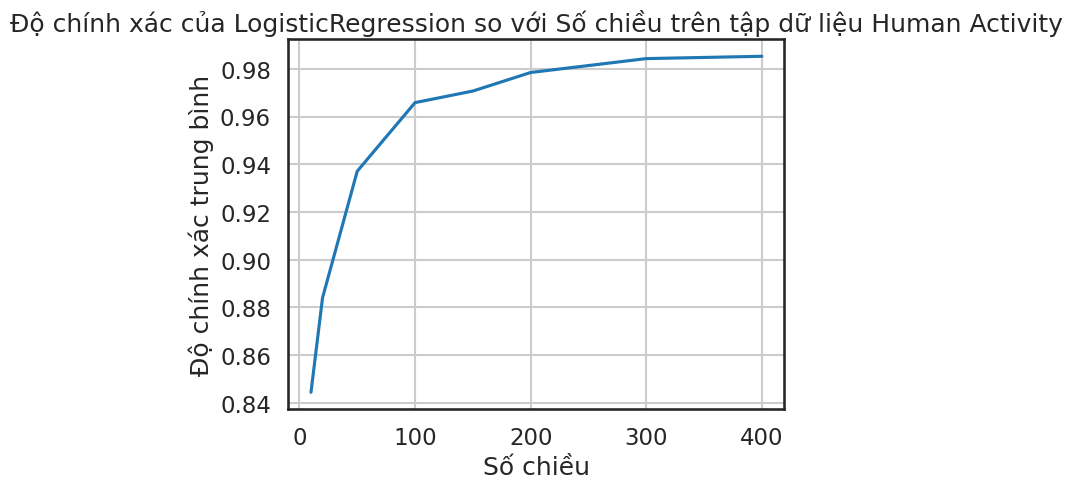

In [87]:
# Đặt ngữ cảnh seaborn cho việc vẽ biểu đồ
sns.set_context('talk')

# Tạo biểu đồ độ chính xác trung bình so với số chiều
ax = plt.axes()
ax.plot(ns, score_list)
# Đặt nhãn và tiêu đề của biểu đồ
ax.set(xlabel='Số chiều',
       ylabel='Độ chính xác trung bình',
       title='Độ chính xác của LogisticRegression so với Số chiều trên tập dữ liệu Human Activity')
# Thêm lưới vào biểu đồ
ax.grid(True)

---
### Machine Learning Foundation (C) 2020 IBM Corporation
